### Exp-6: Time-series: Decompose trend, seasonal, cyclic component, ETS decomposition

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [112]:
tsdata=np.loadtxt("D:\\SEM 3\Python for Data Science\\tsdata.txt")

In [113]:
tsdata.shape

(2624, 2)

In [114]:
df=pd.DataFrame(tsdata)
df.columns=['Timestamp','Variable']
df.head()

,Timestamp,Variable
0,20040720.0,0.00235
1,20040721.0,0.00233
2,20040722.0,0.00235
3,20040723.0,0.00242
4,20040726.0,0.00242


In [115]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y%m%d')  # Convert to datetime format
df.set_index('Timestamp', inplace=True)

In [116]:
df

,Variable
Timestamp,
2004-07-20,0.00235
2004-07-21,0.00233
2004-07-22,0.00235
2004-07-23,0.00242
2004-07-26,0.00242
...,...
2014-09-15,0.00356
2014-09-16,0.00352
2014-09-17,0.00345


In [117]:
df.isna().sum()

Variable    0
dtype: int64

In [121]:
df1['Close'].isna().sum()

1825

####  Decompose trend, seasonal, cyclic component

In [76]:
decomposition = sm.tsa.seasonal_decompose(df['Variable'], model='additive')

In [77]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

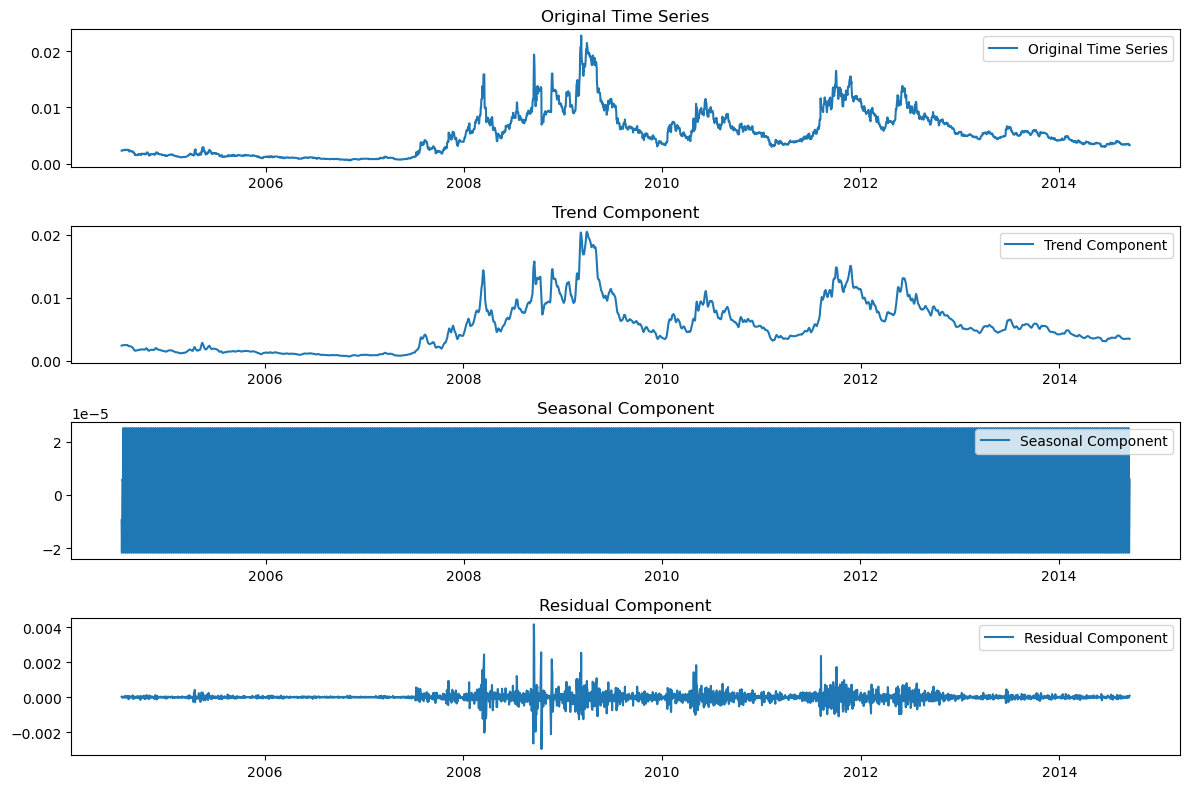

In [78]:
# Plot the original time series and the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.title("Original Time Series")
plt.plot(df['Variable'], label='Original Time Series')
plt.legend()

plt.subplot(4,1,2)
plt.title("Trend Component")
plt.plot(trend, label='Trend Component')
plt.legend()

plt.subplot(4,1,3)
plt.title("Seasonal Component")
plt.plot(seasonal, label='Seasonal Component')
plt.legend()

plt.subplot(4,1,4)
plt.title("Residual Component")
plt.plot(residual, label='Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

<Axes: xlabel='Timestamp'>

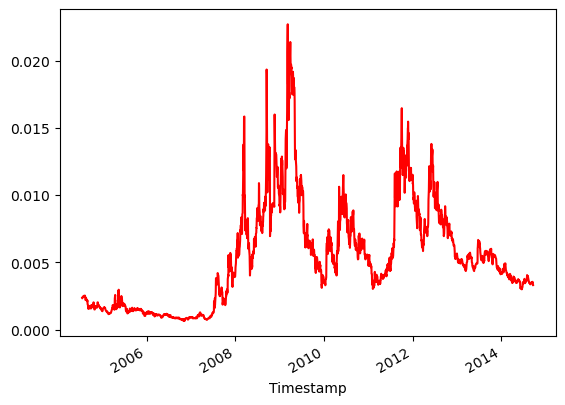

In [11]:
df['Variable'].plot(kind='line',color='red')

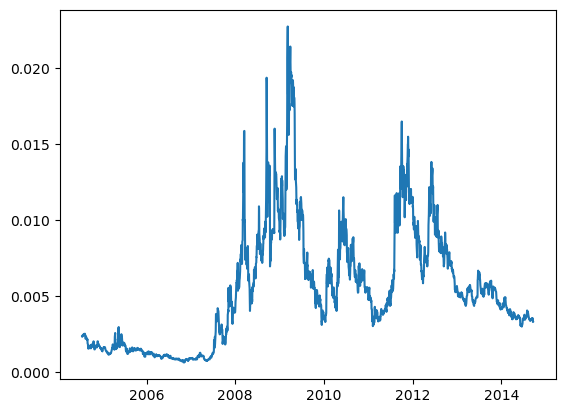

In [12]:
plt.plot(df.index,df['Variable'])
plt.show()

<Axes: ylabel='Frequency'>

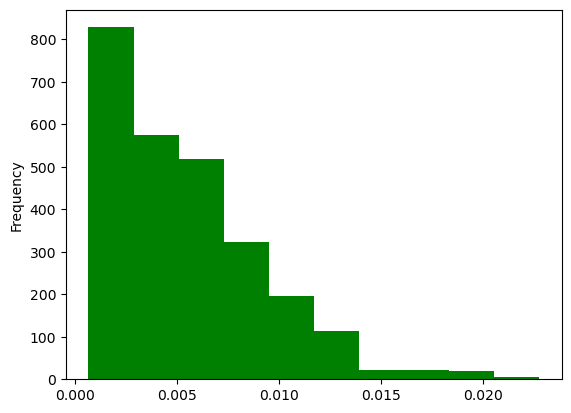

In [13]:
df['Variable'].plot(kind='hist',color='green')

<Axes: >

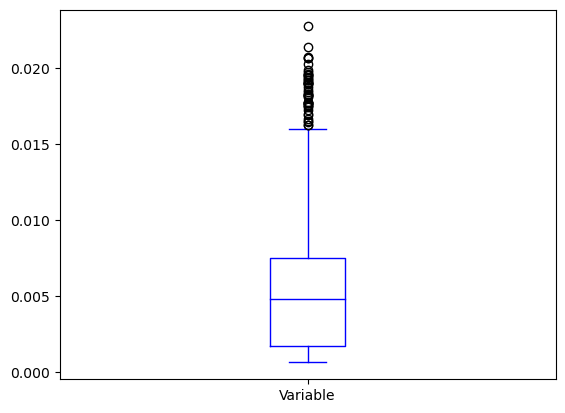

In [14]:
df['Variable'].plot(kind='box',color='blue')

In [15]:
df['1ODF']=df['Variable'].diff()
df['2ODF']=df['1ODF'].diff()
df['3ODF']=df['2ODF'].diff()

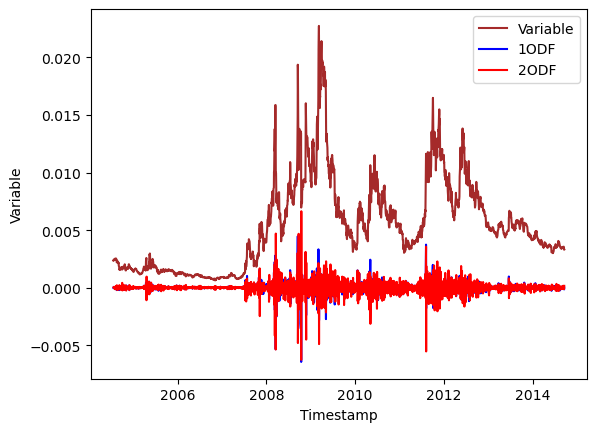

In [18]:
plt.plot(df.index,df['Variable'],color='brown')
plt.plot(df.index,df['1ODF'],color='blue')
plt.plot(df.index,df['2ODF'],color='red')
plt.legend(['Variable','1ODF','2ODF','3ODF'])
plt.xlabel('Timestamp')
plt.ylabel('Variable')
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

In [20]:
errors = np.random.normal(0, 1, 400)
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [21]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [22]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

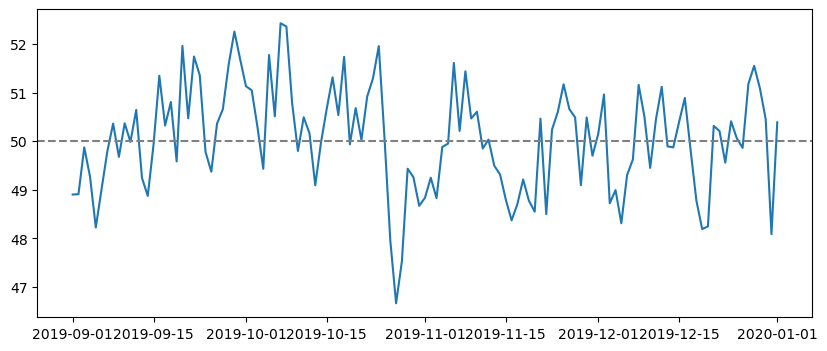

In [23]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

<BarContainer object of 10 artists>

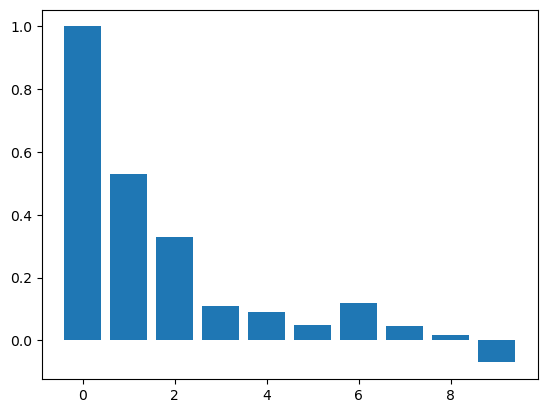

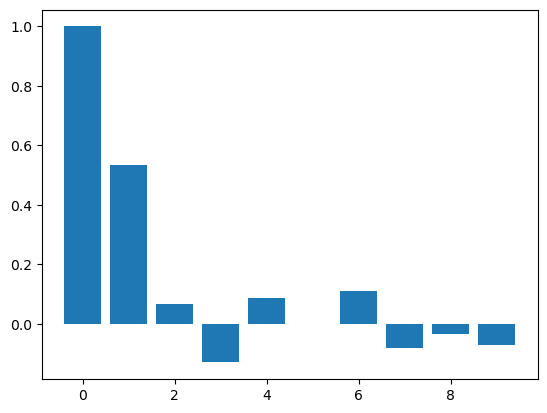

In [24]:
acf_vals = acf(series)
pacf_vals=pacf(series)
num_lags = 10
plt.figure()
plt.bar(range(num_lags), acf_vals[:num_lags])
plt.figure()
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [26]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')

    # Extract and print test results
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic',
                    'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in result[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Check stationarity
test_stationarity(df['Variable'])

Results of Dickey-Fuller Test:
Test Statistic                   -2.800324
p-value                           0.058227
#Lags Used                       17.000000
Number of Observations Used    2606.000000
Critical Value (1%)              -3.432862
Critical Value (5%)              -2.862650
Critical Value (10%)             -2.567361
dtype: float64


In [31]:
df

,Variable,1ODF,2ODF,3ODF
Timestamp,,,,
2004-07-20,0.00235,NaN,NaN,NaN
2004-07-21,0.00233,-0.00002,NaN,NaN
2004-07-22,0.00235,0.00002,0.00004,NaN
2004-07-23,0.00242,0.00007,0.00005,0.00001
2004-07-26,0.00242,0.00000,-0.00007,-0.00012
...,...,...,...,...
2014-09-15,0.00356,0.00007,0.00007,0.00007
2014-09-16,0.00352,-0.00004,-0.00011,-0.00018
2014-09-17,0.00345,-0.00007,-0.00003,0.00008


#### ETS Decomposition

In [79]:
result = sm.tsa.seasonal_decompose(df['Variable'], model='multiplicative', extrapolate_trend='freq')

In [80]:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

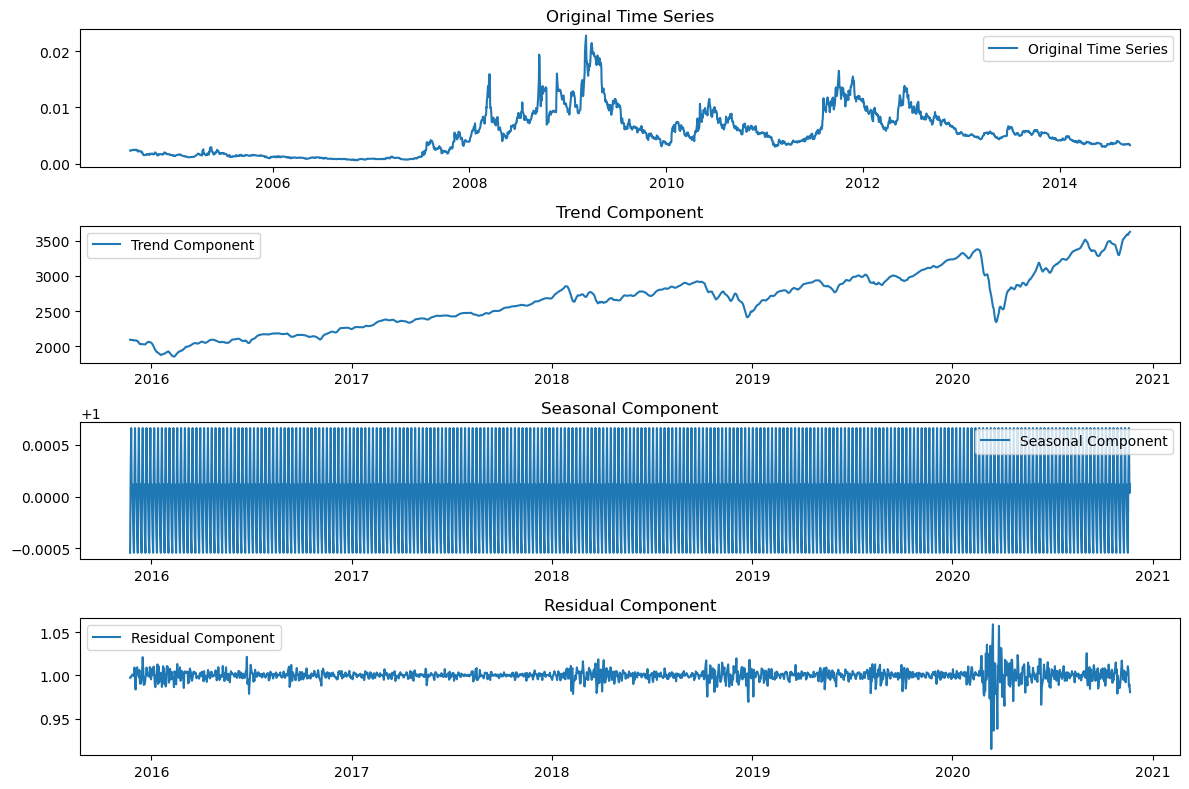

In [147]:
plt.figure(figsize=(12, 8))
plt.subplot(4,1,1)
plt.title("Original Time Series")
plt.plot(df['Variable'], label='Original Time Series')
plt.legend()

plt.subplot(4,1,2)
plt.title("Trend Component")
plt.plot(trend, label='Trend Component')
plt.legend()

plt.subplot(4,1,3)
plt.title("Seasonal Component")
plt.plot(seasonal, label='Seasonal Component')
plt.legend()

plt.subplot(4,1,4)
plt.title("Residual Component")
plt.plot(residual, label='Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

### Yahoo Dataset

In [133]:
df1=pd.read_csv("D:\SEM 3\Python for Data Science\\yahoo_stock.csv")

In [134]:
df1.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [135]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

In [136]:
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


#### Decompose trend, seasonal, cyclic component

In [137]:
df1 = df1.asfreq('D')
df1['Close'].fillna(method='ffill', inplace=True)

In [138]:
df1['Close'].isna().sum()

0

In [139]:
decomposition = sm.tsa.seasonal_decompose(df1['Close'], model='additive', period=1)

In [140]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

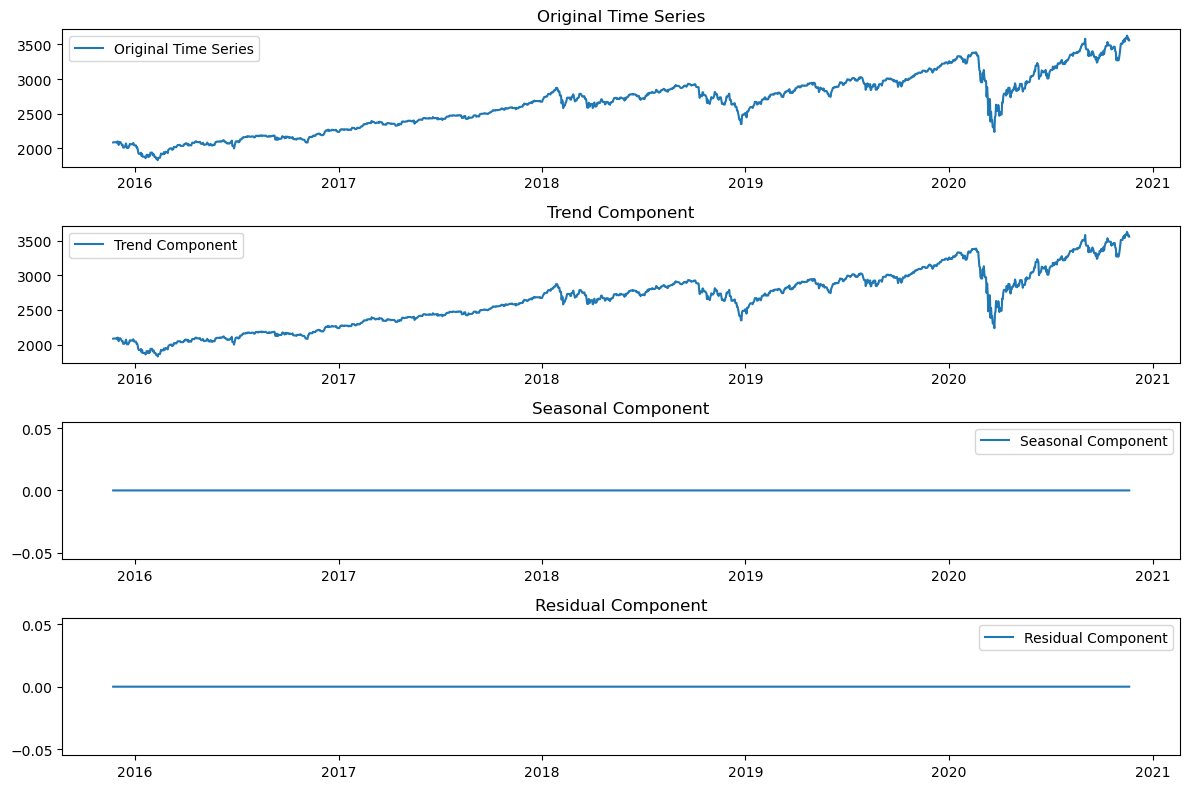

In [142]:
plt.figure(figsize=(12, 8))
plt.subplot(4,1,1)
plt.title("Original Time Series")
plt.plot(df1['Close'], label='Original Time Series')
plt.legend()

plt.subplot(4,1,2)
plt.title("Trend Component")
plt.plot(trend, label='Trend Component')
plt.legend()

plt.subplot(4,1,3)
plt.title("Seasonal Component")
plt.plot(seasonal, label='Seasonal Component')
plt.legend()

plt.subplot(4,1,4)
plt.title("Residual Component")
plt.plot(residual, label='Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

#### ETS Decomposition

In [143]:
result = sm.tsa.seasonal_decompose(df1['Close'], model='multiplicative', extrapolate_trend='freq')

In [145]:
trend=result.trend
seasonal=result.seasonal
residual=result.resid

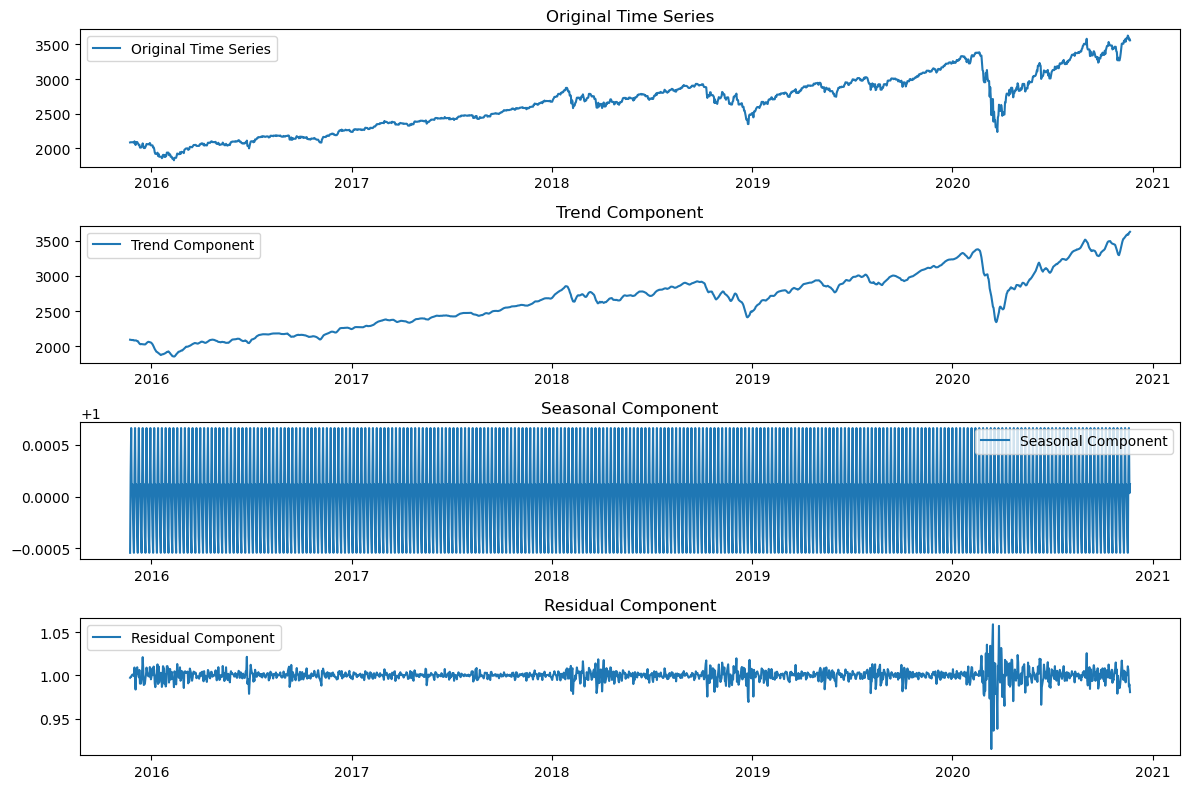

In [148]:
plt.figure(figsize=(12, 8))
plt.subplot(4,1,1)
plt.title("Original Time Series")
plt.plot(df1['Close'], label='Original Time Series')
plt.legend()

plt.subplot(4,1,2)
plt.title("Trend Component")
plt.plot(trend, label='Trend Component')
plt.legend()

plt.subplot(4,1,3)
plt.title("Seasonal Component")
plt.plot(seasonal, label='Seasonal Component')
plt.legend()

plt.subplot(4,1,4)
plt.title("Residual Component")
plt.plot(residual, label='Residual Component')
plt.legend()

plt.tight_layout()
plt.show()